**Install and Import Dependencies (PyTorch + NLP + Vision)**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch import optim

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re
import spacy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
!pip install keras
!pip install tensorflow

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

**Load Mirage-News Dataset**

In [ ]:
import os
from dotenv import load_dotenv

# Load variables from .env
load_dotenv()

# Get token
hf_token = os.getenv("HF_TOKEN")

# Login securely
from huggingface_hub import login
login(token=hf_token)

In [5]:
!pip install datasets --quiet
from datasets import load_dataset
dataset = load_dataset("anson-huang/mirage-news")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/655M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/143M [00:00<?, ?B/s]

test1_nyt_mj-00000-of-00001.parquet:   0%|          | 0.00/20.2M [00:00<?, ?B/s]

test2_bbc_dalle-00000-of-00002.parquet:   0%|          | 0.00/560M [00:00<?, ?B/s]

test2_bbc_dalle-00001-of-00002.parquet:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

test3_cnn_dalle-00000-of-00002.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

test3_cnn_dalle-00001-of-00002.parquet:   0%|          | 0.00/25.8M [00:00<?, ?B/s]

test4_bbc_sdxl-00000-of-00001.parquet:   0%|          | 0.00/46.0M [00:00<?, ?B/s]

test5_cnn_sdxl-00000-of-00001.parquet:   0%|          | 0.00/54.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Generating test1_nyt_mj split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test2_bbc_dalle split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test3_cnn_dalle split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test4_bbc_sdxl split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test5_cnn_sdxl split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [6]:
from datasets import load_dataset
dataset = load_dataset("anson-huang/mirage-news")
df = dataset['train'].to_pandas()
print("Available columns:", df.columns.tolist())
df.head()

Available columns: ['image', 'label', 'text']


,image,label,text
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Andal Ampatuan Jr., a notorious crime lord in ..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Senator Christopher J. Dodd, with his wife and..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,An immigrant viciously attacks medical personn...
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,Violent clashes break out in San Francisco on ...
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,A man closes the door of the house after plant...


In [7]:
print("Columns in dataset:", df.columns.tolist())

print("\nMissing values:")
print(df.isnull().sum())

print("\nLabel distribution:")
print(df['label'].value_counts())

Columns in dataset: ['image', 'label', 'text']

Missing values:
image    0
label    0
text     0
dtype: int64

Label distribution:
label
1    5000
0    5000
Name: count, dtype: int64


In [8]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("anson-huang/mirage-news")
df = dataset["train"].to_pandas()

df = df.dropna(subset=["text", "image"])

df = df[(df['text'].str.strip() != "")]

print("Total usable samples:", len(df))
df.head()

Total usable samples: 10000


,image,label,text
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Andal Ampatuan Jr., a notorious crime lord in ..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,"Senator Christopher J. Dodd, with his wife and..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,An immigrant viciously attacks medical personn...
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,Violent clashes break out in San Francisco on ...
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1,A man closes the door of the house after plant...


**Clean Data Loading and Splitting**

In [9]:
!pip install datasets --quiet

import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split

dataset = load_dataset("anson-huang/mirage-news")
df = dataset["train"].to_pandas()

df = df.dropna(subset=["text", "image"])
df = df[df["text"].str.strip() != ""]

print("Total usable samples:", len(df))

train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["label"],
    random_state=42
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=42
)

train_df["clean_title"] = train_df["text"]
valid_df["clean_title"] = valid_df["text"]
test_df["clean_title"]  = test_df["text"]

train_df["2_way_label"] = train_df["label"]
valid_df["2_way_label"] = valid_df["label"]
test_df["2_way_label"]  = test_df["label"]

train_news = list(train_df["clean_title"])
train_labels = list(train_df["6_way_label"])

valid_news = list(valid_df["clean_title"])
valid_labels = list(valid_df["6_way_label"])

test_news = list(test_df["clean_title"])
test_labels = list(test_df["6_way_label"])

print("Split complete:")
print(f"Train size: {len(train_news)}")
print(f"Valid size: {len(valid_news)}")
print(f"Test size : {len(test_news)}")

Total usable samples: 10000
Split complete:
Train size: 7000
Valid size: 1500
Test size : 1500


 **Text Preprocessing Pipeline**

 ***Define Preprocessing Functions***

In [10]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Clean Text (remove punctuation, numbers, multiple spaces)**

In [11]:
import re

def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

train_news_clean_1 = [preprocess_text(new) for new in train_news]
valid_news_clean_1 = [preprocess_text(new) for new in valid_news]
test_news_clean_1  = [preprocess_text(new) for new in test_news]

**Remove stopwords + Lemmatization (noun, verb, adjective)**

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def remove_stopwords_lem(text):
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    lemmatized_text = []
    for word in text:
        word1 = lemmatizer.lemmatize(word, pos="n")
        word2 = lemmatizer.lemmatize(word1, pos="v")
        word3 = lemmatizer.lemmatize(word2, pos="a")
        lemmatized_text.append(word3)
    return ' '.join(lemmatized_text)

train_stwrd_lem = [remove_stopwords_lem(text) for text in train_news_clean_1]
valid_stwrd_lem = [remove_stopwords_lem(text) for text in valid_news_clean_1]
test_stwrd_lem  = [remove_stopwords_lem(text) for text in test_news_clean_1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization Using Tokenizer from Keras**

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

news_all = train_stwrd_lem + valid_stwrd_lem + test_stwrd_lem

tokenizer = Tokenizer(num_words=128022)

tokenizer.fit_on_texts(news_all)
train_tokenized = tokenizer.texts_to_sequences(train_stwrd_lem)
valid_tokenized = tokenizer.texts_to_sequences(valid_stwrd_lem)
test_tokenized = tokenizer.texts_to_sequences(test_stwrd_lem)

In [14]:
print("Vocabulary length: ", len(tokenizer.word_index))

Vocabulary length:  12090


**Function to compute sequence lengths**

In [15]:
def length_squences(data):
    lengths = []
    for i in range(len(data)):
        lengths.append(len(data[i]))
    return lengths

**Calculate percentage of sequences below certain lengths python**

In [16]:
import numpy as np

length = [10, 15, 20, 25]

lengths_train = np.array(length_squences(train_tokenized))
perc_length_train = []
for lgth in length:
    perc_length_train.append(sum(lengths_train < lgth) / len(lengths_train) * 100)
print("Percentages (train):", perc_length_train)

lengths_valid = np.array(length_squences(valid_tokenized))
perc_length_valid = []
for lgth in length:
    perc_length_valid.append(sum(lengths_valid < lgth) / len(lengths_valid) * 100)
print("Percentages (validation):", perc_length_valid)

lengths_test = np.array(length_squences(test_tokenized))
perc_length_test = []
for lgth in length:
    perc_length_test.append(sum(lengths_test < lgth) / len(lengths_test) * 100)
print("Percentages (test):", perc_length_test)

Percentages (train): [np.float64(18.342857142857145), np.float64(66.35714285714286), np.float64(90.0), np.float64(97.08571428571429)]
Percentages (validation): [np.float64(18.066666666666666), np.float64(64.2), np.float64(89.13333333333333), np.float64(97.26666666666667)]
Percentages (test): [np.float64(15.933333333333334), np.float64(65.33333333333333), np.float64(90.33333333333333), np.float64(98.0)]


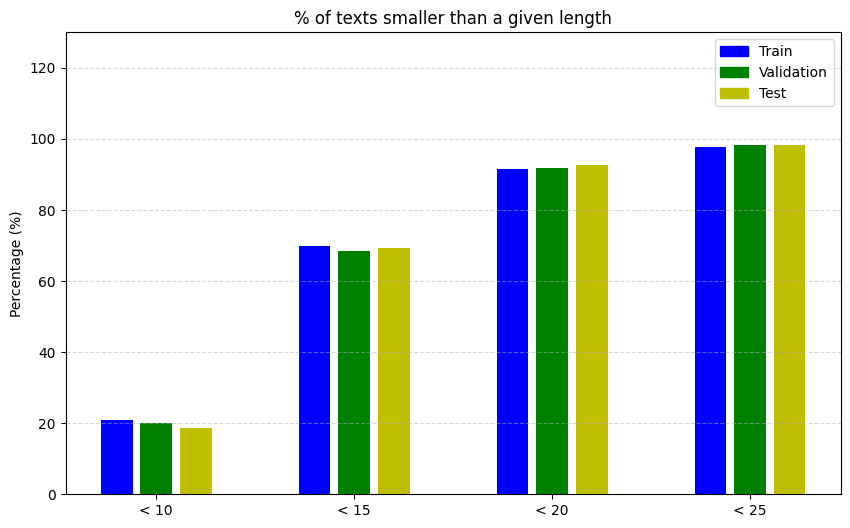

In [17]:
import numpy as np
import matplotlib.pyplot as plt

train = [np.float64(21.014285714285712), np.float64(69.85714285714286), np.float64(91.61428571428571), np.float64(97.8)]
val = [np.float64(20.133333333333333), np.float64(68.4), np.float64(91.8), np.float64(98.26666666666667)]
test = [np.float64(18.53333333333333), np.float64(69.33333333333334), np.float64(92.53333333333333), np.float64(98.2)]

bars = []
for i in range(4):
    bars.extend([train[i], val[i], test[i]])

x_pos_bars = [1, 2, 3, 6, 7, 8, 11, 12, 13, 16, 17, 18]

x_pos_labels = [2, 7, 12, 17]
labels = ['< 10', '< 15', '< 20', '< 25']

colors = ['b', 'g', 'y'] * 4

colors_values = {'Train': 'b', 'Validation': 'g', 'Test': 'y'}
labels2 = list(colors_values.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors_values[label]) for label in labels2]

plt.figure(figsize=(10, 6))
plt.bar(x_pos_bars, bars, color=colors)
plt.xticks(x_pos_labels, labels)
plt.legend(handles, labels2)
plt.ylim([0, 130])
plt.ylabel('Percentage (%)')
plt.title('% of texts smaller than a given length')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Pad Sequences**

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 25

X_train = pad_sequences(train_tokenized, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_valid = pad_sequences(valid_tokenized, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test  = pad_sequences(test_tokenized,  maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [19]:
import numpy as np

y_train = np.array(train_labels)
y_valid = np.array(valid_labels)
y_test  = np.array(test_labels)

**Pad or Truncate Sequences**

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_tokenized_pad = pad_sequences(train_tokenized, maxlen=25, truncating='pre', padding='pre')
valid_tokenized_pad = pad_sequences(valid_tokenized, maxlen=25, truncating='pre', padding='pre')
test_tokenized_pad  = pad_sequences(test_tokenized,  maxlen=25, truncating='pre', padding='pre')

**Convert to Tensors and Create DataLoaders**

In [21]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_tensor = torch.Tensor(train_tokenized_pad).int()
valid_tensor = torch.Tensor(valid_tokenized_pad).int()
test_tensor  = torch.Tensor(test_tokenized_pad).int()

train_set = TensorDataset(train_tensor, torch.Tensor(np.array(train_labels)))
valid_set = TensorDataset(valid_tensor, torch.Tensor(np.array(valid_labels)))
test_set  = TensorDataset(test_tensor,  torch.Tensor(np.array(test_labels)))

trainloader = DataLoader(train_set, batch_size=60)
validloader = DataLoader(valid_set, batch_size=60)
testloader  = DataLoader(test_set, batch_size=60)

# **Word Embeddings**

**Load GloVe Word Embeddings**

In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-04-24 08:05:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-24 08:05:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-24 08:05:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

**Load GloVe Word Embeddings**

In [23]:
def load_embedd(filename):
    words = []
    vectors = []
    file = open(filename, 'r', encoding="utf8")
    for line in file.readlines():
        row = line.split(' ')
        vocab = row[0]
        embd = row[1:]
        embd[-1] = embd[-1].rstrip()
        embd = list(map(float, embd))
        words.append(vocab)
        vectors.append(embd)
    file.close()
    return words, vectors

**Create Embedding Matrix**

In [24]:
vocab_gv_300, vectors_gv_300 = load_embedd("glove.6B.300d.txt")

**Build the Matrix for Our Vocabulary**

In [25]:
def embed_matx(word_index, vocab, embeddings, length_vocab, length_embedding):
    embedding_matrix = np.zeros((length_vocab + 1, length_embedding))
    for word, i in word_index.items():
        if word in vocab:
            idx = vocab.index(word)
            vector = embeddings[idx]
            embedding_matrix[i] = vector
        if i == length_vocab:
            break
    return embedding_matrix

In [26]:
word_index = tokenizer.word_index
embedding_matrix_gv_300 = embed_matx(word_index = word_index, vocab = vocab_gv_300, embeddings = vectors_gv_300,
                             length_vocab = 117129, length_embedding = 300)

# Models

**CNN Model Implementation**

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNN(nn.Module):
    def __init__(self, nlabels, train_parameters=True, random_embeddings=True):
        super().__init__()

        self.embedding = nn.Embedding(num_embeddings=117130, embedding_dim=300)

        if random_embeddings:
            self.embedding.weight = nn.Parameter(torch.rand(117130, 300), requires_grad=train_parameters)
        else:
            self.embedding.weight = nn.Parameter(torch.from_numpy(embedding_matrix_gv_300), requires_grad=train_parameters)

        self.filter_sizes = [2, 3, 4, 5]
        self.num_filters = 50

        self.convs_concat = nn.ModuleList([
            nn.Conv2d(1, self.num_filters, (k, 300)) for k in self.filter_sizes
        ])

        self.linear1 = nn.Linear(200, 128)
        self.linear2 = nn.Linear(128, nlabels)

        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = [F.relu(conv(x.float())).squeeze(3) for conv in self.convs_concat]
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]
        x = torch.cat(x, 1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.logsoftmax(x)
        return x

**Early Stopping**

In [28]:
class EarlyStopping:
    def __init__(self, patience=2, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

**Text Preprocessing, Tokenization, Embeddings, DataLoader**

In [29]:
class CNN_extended(CNN):
    def __init__(self, nlabels, train_parameters, random_embeddings, epochs=100, lr=0.001):
        super().__init__(nlabels, train_parameters, random_embeddings)

        self.lr = lr
        self.optim = optim.Adam(self.parameters(), self.lr)
        self.epochs = epochs
        self.criterion = nn.NLLLoss()

        self.loss_during_training = []
        self.valid_loss_during_training = []

    def trainloop(self, trainloader, validloader):
        self.to(device)
        early_stopper = EarlyStopping(patience=1)

        for e in range(int(self.epochs)):
            start_time = time.time()
            running_loss, total, correct = 0.0, 0, 0

            self.train()
            for news, labels in tqdm(trainloader, desc=f"Epoch {e+1}/{self.epochs} - Training"):
                news, labels = news.to(device), labels.to(device)
                self.optim.zero_grad()
                out = self.forward(news.int())
                loss = self.criterion(out, labels.long())
                loss.backward()
                self.optim.step()

                running_loss += loss.item()
                top_p, top_class = out.topk(1, dim=1)
                correct += (top_class == labels.view(-1, 1)).sum().item()
                total += labels.size(0)

            accuracy = correct / total
            self.loss_during_training.append(running_loss / len(trainloader))

            self.eval()
            valid_loss, val_total, val_correct = 0.0, 0, 0
            with torch.no_grad():
                for news, labels in tqdm(validloader, desc=f"Epoch {e+1}/{self.epochs} - Validation"):
                    news, labels = news.to(device), labels.to(device)
                    out = self.forward(news.int())
                    loss = self.criterion(out, labels.long())
                    valid_loss += loss.item()

                    top_p, top_class = out.topk(1, dim=1)
                    val_correct += (top_class == labels.view(-1, 1)).sum().item()
                    val_total += labels.size(0)

            val_accuracy = val_correct / val_total
            avg_valid_loss = valid_loss / len(validloader)
            self.valid_loss_during_training.append(avg_valid_loss)

            print(f"Epoch {e+1}: Train Loss = {self.loss_during_training[-1]:.4f}, "
                  f"Val Loss = {avg_valid_loss:.4f}, "
                  f"Train Acc = {accuracy:.4f}, Val Acc = {val_accuracy:.4f}, "
                  f"Time = {time.time() - start_time:.2f}s")

            early_stopper(avg_valid_loss, self)
            if early_stopper.early_stop:
                print(f"Early stopping triggered at epoch {e+1}.")
                break

        if early_stopper.best_model_state:
            self.load_state_dict(early_stopper.best_model_state)

In [30]:
from torch.utils.data import DataLoader

trainloader = DataLoader(train_set, batch_size=60, shuffle=True)
validloader = DataLoader(valid_set, batch_size=60, shuffle=False)

We train the CNN in **4** different scenarios:

  - **Random embeddings** + **Training embeddings**
  - **GloVe embeddings** + **Training embeddings**
  - **Random embeddings** + **Not training embeddings**
  - **GloVe embeddings** + **Not training embeddings**

We train the model for several epochs. This is done in order to select the optimal number of epochs, which occurs when the validation loss stops decreasing and starts increasing (Early Stopping). Sometimes the validation loss starts to increase after very few epochs. In those cases we stop the training prematurely since we already know the optimal number of epochs (this is what causes the "KeyboardInterrupt" message in some of the results which can be seen below).

### Random embeddings  + Training embeddings

In [31]:
CNN_train_random = CNN_extended(nlabels = 2, epochs=5, lr=0.003, train_parameters = True, random_embeddings = True)
CNN_train_random.trainloop(trainloader, validloader)

Epoch 1/5 - Validation: 100%|██████████| 25/25 [00:00<00:00, 531.29it/s]


Epoch 1: Train Loss = 0.7086, Val Loss = 0.6894, Train Acc = 0.5030, Val Acc = 0.5007, Time = 3.92s


Epoch 2/5 - Validation: 100%|██████████| 25/25 [00:00<00:00, 519.52it/s]


Epoch 2: Train Loss = 0.5764, Val Loss = 0.5301, Train Acc = 0.6870, Val Acc = 0.7260, Time = 2.12s


Epoch 3/5 - Validation: 100%|██████████| 25/25 [00:00<00:00, 492.11it/s]

Epoch 3: Train Loss = 0.3825, Val Loss = 0.6093, Train Acc = 0.8383, Val Acc = 0.6933, Time = 2.14s
EarlyStopping counter: 1/1
Early stopping triggered at epoch 3.


### GloVe embeddings  + Training embeddings

In [32]:
CNN_train_not_random = CNN_extended(
    nlabels=2,
    epochs=4,
    lr=0.003,
    train_parameters=True,
    random_embeddings=False
)


CNN_train_not_random.trainloop(trainloader, validloader)

Epoch 1/4 - Validation: 100%|██████████| 25/25 [00:00<00:00, 652.00it/s]


Epoch 1: Train Loss = 0.5003, Val Loss = 0.4213, Train Acc = 0.7571, Val Acc = 0.8053, Time = 4.58s


Epoch 2/4 - Validation: 100%|██████████| 25/25 [00:00<00:00, 621.85it/s]

Epoch 2: Train Loss = 0.2796, Val Loss = 0.4637, Train Acc = 0.8860, Val Acc = 0.7907, Time = 4.43s
EarlyStopping counter: 1/1
Early stopping triggered at epoch 2.


### Random embeddings  + Not training embeddings

In [33]:
CNN_not_train_random = CNN_extended(nlabels=2, epochs=9, lr=0.003, train_parameters=False, random_embeddings=True)

CNN_not_train_random.trainloop(trainloader, validloader)

Epoch 1/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 676.32it/s]


Epoch 1: Train Loss = 0.7024, Val Loss = 0.6914, Train Acc = 0.4946, Val Acc = 0.5000, Time = 0.59s


Epoch 2/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 675.57it/s]


Epoch 2: Train Loss = 0.6869, Val Loss = 0.6809, Train Acc = 0.5314, Val Acc = 0.5300, Time = 0.44s


Epoch 3/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 702.69it/s]


Epoch 3: Train Loss = 0.6401, Val Loss = 0.6392, Train Acc = 0.6126, Val Acc = 0.5947, Time = 0.44s


Epoch 4/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 688.39it/s]


Epoch 4: Train Loss = 0.6117, Val Loss = 0.6309, Train Acc = 0.6506, Val Acc = 0.6207, Time = 0.44s


Epoch 5/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 684.64it/s]

Epoch 5: Train Loss = 0.5877, Val Loss = 0.6685, Train Acc = 0.6693, Val Acc = 0.5813, Time = 0.44s
EarlyStopping counter: 1/1
Early stopping triggered at epoch 5.


### GloVe embeddings  + Not training embeddings

In [34]:
CNN_not_train_not_random = CNN_extended(nlabels=2, epochs=9, lr=0.003, train_parameters=False, random_embeddings=False)
CNN_not_train_not_random.trainloop(trainloader, validloader)

Epoch 1/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 485.92it/s]


Epoch 1: Train Loss = 0.5454, Val Loss = 0.5082, Train Acc = 0.7149, Val Acc = 0.7473, Time = 0.47s


Epoch 2/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 644.15it/s]


Epoch 2: Train Loss = 0.3785, Val Loss = 0.4806, Train Acc = 0.8347, Val Acc = 0.7813, Time = 0.46s


Epoch 3/9 - Validation: 100%|██████████| 25/25 [00:00<00:00, 644.10it/s]

Epoch 3: Train Loss = 0.2638, Val Loss = 0.5428, Train Acc = 0.8946, Val Acc = 0.7760, Time = 0.44s
EarlyStopping counter: 1/1
Early stopping triggered at epoch 3.


## Testing performance

We join the **train** and **validation** datasets and we train the model with this dataset using the optimal number of epochs. Then we evaluate the model with the **test** set. First we need to modify a bit the class used previously.

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
class CNN_extended(CNN):

    def __init__(self, nlabels, train_parameters, random_embeddings, epochs=100, lr=0.001):
        super().__init__(nlabels, train_parameters, random_embeddings)

        self.lr = lr
        self.optim = optim.Adam(self.parameters(), self.lr)
        self.epochs = epochs
        self.criterion = nn.NLLLoss()

        self.loss_during_training = []
        self.valid_loss_during_training = []


    def trainloop(self, trainloader, validloader=None):
        self.to(device)

        for e in range(int(self.epochs)):
            start_time = time.time()

            # --- Training ---
            self.train()
            running_loss = 0.0
            length = 0
            accuracies = []

            for news, labels in trainloader:
                news, labels = news.to(device), labels.to(device)

                self.optim.zero_grad()
                out = self.forward(news.int())
                loss = self.criterion(out, labels.long())
                loss.backward()
                self.optim.step()

                running_loss += loss.item()

                top_p, top_class = out.topk(1, dim=1)
                equals = (top_class == labels.view(-1, 1))
                length += labels.size(0)
                accuracies.append(equals.sum().item())

            avg_train_loss = running_loss / len(trainloader)
            train_accuracy = sum(accuracies) / length
            self.loss_during_training.append(avg_train_loss)

            if validloader is not None:
                self.eval()
                valid_loss = 0.0
                val_total = 0
                val_correct = 0

                with torch.no_grad():
                    for news, labels in validloader:
                        news, labels = news.to(device), labels.to(device)
                        out = self.forward(news.int())
                        loss = self.criterion(out, labels.long())
                        valid_loss += loss.item()

                        top_p, top_class = out.topk(1, dim=1)
                        val_correct += (top_class == labels.view(-1, 1)).sum().item()
                        val_total += labels.size(0)

                avg_valid_loss = valid_loss / len(validloader)
                val_accuracy = val_correct / val_total
                self.valid_loss_during_training.append(avg_valid_loss)

                print(f"Epoch {e+1}: Train Loss={avg_train_loss:.4f}, "
                      f"Val Loss={avg_valid_loss:.4f}, "
                      f"Train Acc={train_accuracy:.4f}, "
                      f"Val Acc={val_accuracy:.4f}")
            else:
                print(f"Epoch {e+1}: Train Loss={avg_train_loss:.4f}, Train Acc={train_accuracy:.4f}")

            print(f"Elapsed time: {time.time() - start_time:.2f}s")


    def eval_performance(self, dataloader):
        predictions = np.empty((1, 1))

        with torch.no_grad():
            for news, labels in dataloader:
                news = news.to(device)
                logprobs = self.forward(news.int())
                top_p, top_class = logprobs.topk(1, dim=1)

                top_class_array = np.array(top_class.cpu())
                predictions = np.concatenate((predictions, top_class_array), axis=0)

        return predictions[1:]

Now we join the train and validation sets.

In [37]:
train_valid_tokenized_pad = np.concatenate((train_tokenized_pad, valid_tokenized_pad), axis=0)
train_valid_labels = np.concatenate((np.array(train_labels), np.array(valid_labels)), axis=0)

train_valid_tensor = torch.Tensor(train_valid_tokenized_pad).int()
test_tensor = torch.Tensor(test_tokenized_pad).int()

train_valid_set = TensorDataset(train_valid_tensor, torch.Tensor(np.array(train_valid_labels)))
train_valid_loader = DataLoader(train_valid_set, batch_size=60)

test_set = TensorDataset(test_tensor, torch.Tensor(np.array(test_labels)))
testloader = DataLoader(test_set, batch_size=60)

### Random embeddings  + Training embeddings

In [38]:
CNN_test_train_random = CNN_extended(
    nlabels=2,
    epochs=20,
    lr=0.003,
    train_parameters=True,
    random_embeddings=True
)

CNN_test_train_random.trainloop(trainloader=train_valid_loader, validloader=testloader)

predictions1 = CNN_test_train_random.eval_performance(testloader)

Epoch 1: Train Loss=0.6924, Val Loss=0.6580, Train Acc=0.5398, Val Acc=0.6093
Elapsed time: 2.52s
Epoch 2: Train Loss=0.4778, Val Loss=0.4678, Train Acc=0.7664, Val Acc=0.7693
Elapsed time: 2.49s
Epoch 3: Train Loss=0.3086, Val Loss=0.5274, Train Acc=0.8728, Val Acc=0.7653
Elapsed time: 2.48s
Epoch 4: Train Loss=0.2347, Val Loss=0.5989, Train Acc=0.9094, Val Acc=0.7567
Elapsed time: 2.50s
Epoch 5: Train Loss=0.2149, Val Loss=0.6996, Train Acc=0.9132, Val Acc=0.7733
Elapsed time: 2.44s
Epoch 6: Train Loss=0.1601, Val Loss=0.7483, Train Acc=0.9373, Val Acc=0.7547
Elapsed time: 2.36s
Epoch 7: Train Loss=0.1238, Val Loss=0.9045, Train Acc=0.9531, Val Acc=0.7333
Elapsed time: 2.36s
Epoch 8: Train Loss=0.1093, Val Loss=1.4150, Train Acc=0.9595, Val Acc=0.6740
Elapsed time: 2.35s
Epoch 9: Train Loss=0.1193, Val Loss=1.4158, Train Acc=0.9527, Val Acc=0.7047
Elapsed time: 2.39s
Epoch 10: Train Loss=0.1000, Val Loss=1.2763, Train Acc=0.9599, Val Acc=0.7493
Elapsed time: 2.52s
Epoch 11: Train Los

In [39]:
print(classification_report(np.array(test_labels).reshape(len(test_labels),1), predictions1))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       750
           1       0.72      0.76      0.74       750

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



In [40]:
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels),1), predictions1))

[[529 221]
 [183 567]]


### GloVe embeddings  + Training embeddings

In [41]:
CNN_test_train_not_random = CNN_extended(
    nlabels=2,
    epochs=20,
    lr=0.003,
    train_parameters=True,
    random_embeddings=False
)

CNN_test_train_not_random.trainloop(trainloader=train_valid_loader, validloader=testloader)

predictions_2 = CNN_test_train_not_random.eval_performance(testloader)

Epoch 1: Train Loss=0.4881, Val Loss=0.4208, Train Acc=0.7587, Val Acc=0.8160
Elapsed time: 5.53s
Epoch 2: Train Loss=0.2786, Val Loss=0.4994, Train Acc=0.8855, Val Acc=0.8000
Elapsed time: 5.36s
Epoch 3: Train Loss=0.1769, Val Loss=0.6833, Train Acc=0.9292, Val Acc=0.7433
Elapsed time: 5.48s
Epoch 4: Train Loss=0.1293, Val Loss=1.0894, Train Acc=0.9489, Val Acc=0.7280
Elapsed time: 5.44s
Epoch 5: Train Loss=0.0710, Val Loss=1.3290, Train Acc=0.9731, Val Acc=0.7740
Elapsed time: 5.45s
Epoch 6: Train Loss=0.0401, Val Loss=1.4099, Train Acc=0.9856, Val Acc=0.7447
Elapsed time: 5.53s
Epoch 7: Train Loss=0.0364, Val Loss=1.8716, Train Acc=0.9861, Val Acc=0.7487
Elapsed time: 5.47s
Epoch 8: Train Loss=0.0369, Val Loss=1.6737, Train Acc=0.9865, Val Acc=0.7120
Elapsed time: 5.64s
Epoch 9: Train Loss=0.0322, Val Loss=1.6592, Train Acc=0.9894, Val Acc=0.7127
Elapsed time: 5.52s
Epoch 10: Train Loss=0.0370, Val Loss=1.4440, Train Acc=0.9858, Val Acc=0.7533
Elapsed time: 5.51s
Epoch 11: Train Los

In [42]:
print(classification_report(np.array(test_labels).reshape(len(test_labels),1), predictions_2))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       750
           1       0.75      0.77      0.76       750

    accuracy                           0.76      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.76      0.76      0.76      1500



In [43]:
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels),1), predictions_2))

[[561 189]
 [176 574]]


### Random embeddings  +  Not training embeddings

In [44]:
CNN_test_not_train_random = CNN_extended(
    nlabels=2,
    epochs=30,
    lr=0.003,
    train_parameters=False,
    random_embeddings=True
)

CNN_test_not_train_random.trainloop(trainloader=train_valid_loader, validloader=testloader)

predictions_3 = CNN_test_not_train_random.eval_performance(testloader)

Epoch 1: Train Loss=0.7037, Val Loss=0.6887, Train Acc=0.5108, Val Acc=0.5580
Elapsed time: 0.69s
Epoch 2: Train Loss=0.6821, Val Loss=0.6659, Train Acc=0.5539, Val Acc=0.6007
Elapsed time: 0.75s
Epoch 3: Train Loss=0.6147, Val Loss=0.6448, Train Acc=0.6571, Val Acc=0.6340
Elapsed time: 0.52s
Epoch 4: Train Loss=0.5645, Val Loss=0.6055, Train Acc=0.7016, Val Acc=0.6733
Elapsed time: 0.50s
Epoch 5: Train Loss=0.5257, Val Loss=0.5782, Train Acc=0.7356, Val Acc=0.6920
Elapsed time: 0.52s
Epoch 6: Train Loss=0.5058, Val Loss=0.5780, Train Acc=0.7507, Val Acc=0.6913
Elapsed time: 0.53s
Epoch 7: Train Loss=0.4933, Val Loss=0.5672, Train Acc=0.7601, Val Acc=0.6967
Elapsed time: 0.53s
Epoch 8: Train Loss=0.4682, Val Loss=0.6143, Train Acc=0.7809, Val Acc=0.6680
Elapsed time: 0.51s
Epoch 9: Train Loss=0.4651, Val Loss=0.6484, Train Acc=0.7807, Val Acc=0.6280
Elapsed time: 0.52s
Epoch 10: Train Loss=0.4623, Val Loss=0.5806, Train Acc=0.7804, Val Acc=0.6780
Elapsed time: 0.51s
Epoch 11: Train Los

In [45]:
print(classification_report(np.array(test_labels).reshape(len(test_labels),1), predictions_3))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       750
           1       0.71      0.61      0.66       750

    accuracy                           0.68      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.68      0.68      0.68      1500



In [46]:
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels),1), predictions_3))

[[562 188]
 [290 460]]


### GloVe embeddings  +  Not training embeddings

In [47]:
CNN_test_not_train_not_random = CNN_extended(
    nlabels=2,
    epochs=30,
    lr=0.003,
    train_parameters=False,
    random_embeddings=False
)

CNN_test_not_train_not_random.trainloop(trainloader=train_valid_loader, validloader=testloader)

predictions_4 = CNN_test_not_train_not_random.eval_performance(testloader)

Epoch 1: Train Loss=0.5173, Val Loss=0.4503, Train Acc=0.7392, Val Acc=0.7860
Elapsed time: 0.55s
Epoch 2: Train Loss=0.3725, Val Loss=0.4999, Train Acc=0.8365, Val Acc=0.7780
Elapsed time: 0.52s
Epoch 3: Train Loss=0.2707, Val Loss=0.6591, Train Acc=0.8894, Val Acc=0.7540
Elapsed time: 0.52s
Epoch 4: Train Loss=0.2388, Val Loss=0.6395, Train Acc=0.9009, Val Acc=0.7240
Elapsed time: 0.53s
Epoch 5: Train Loss=0.2007, Val Loss=0.7734, Train Acc=0.9216, Val Acc=0.7580
Elapsed time: 0.52s
Epoch 6: Train Loss=0.1883, Val Loss=0.7619, Train Acc=0.9254, Val Acc=0.7373
Elapsed time: 0.53s
Epoch 7: Train Loss=0.1636, Val Loss=1.1946, Train Acc=0.9348, Val Acc=0.6767
Elapsed time: 0.52s
Epoch 8: Train Loss=0.1530, Val Loss=1.1601, Train Acc=0.9389, Val Acc=0.6900
Elapsed time: 0.52s
Epoch 9: Train Loss=0.1344, Val Loss=1.2384, Train Acc=0.9488, Val Acc=0.6853
Elapsed time: 0.51s
Epoch 10: Train Loss=0.1090, Val Loss=1.3158, Train Acc=0.9573, Val Acc=0.7220
Elapsed time: 0.52s
Epoch 11: Train Los

In [48]:
print(classification_report(np.array(test_labels).reshape(len(test_labels),1), predictions_4))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       750
           1       0.74      0.75      0.74       750

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500



In [49]:
print(confusion_matrix(np.array(test_labels).reshape(len(test_labels),1), predictions_4))

[[556 194]
 [190 560]]
